# Lecture-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 23.7MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [ ]:
mobile_sales.dtypes

,0
DATE,datetime64[ns]
Sales,float64


In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [ ]:
12*18 + 1

217

In [ ]:
mobile_sales.isnull().sum()

,0
DATE,0
Sales,19


In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


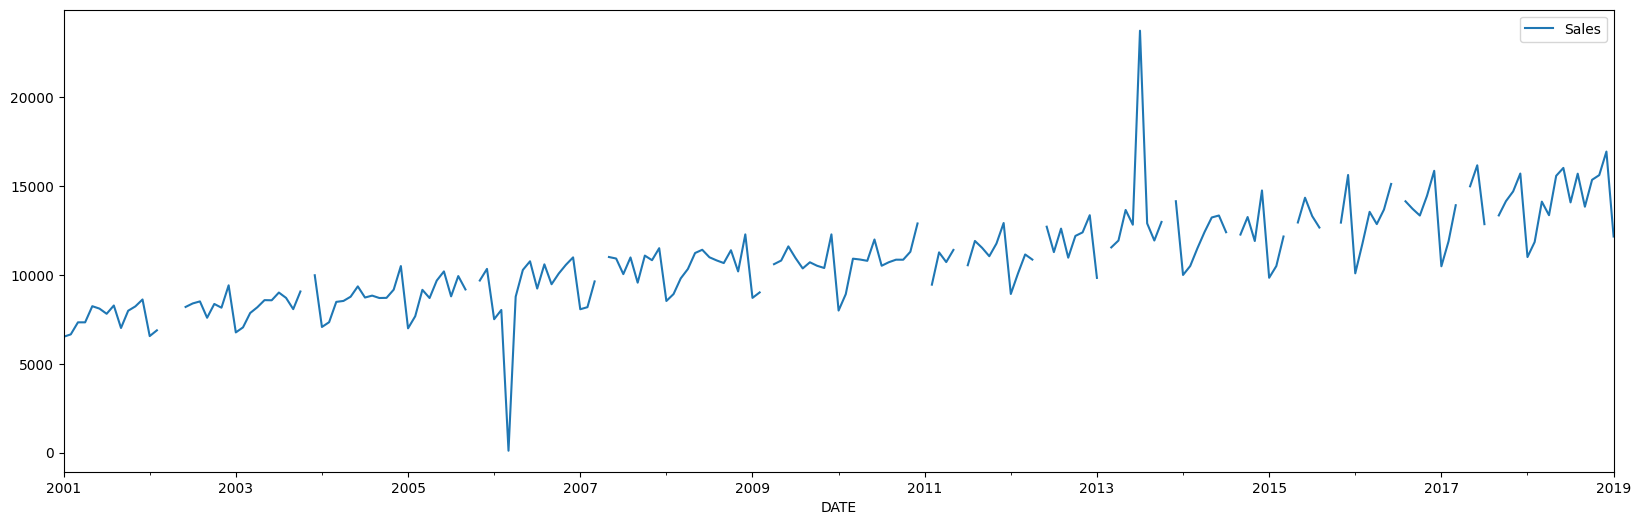

In [ ]:
mobile_sales.plot();

In [ ]:
19/217

0.08755760368663594

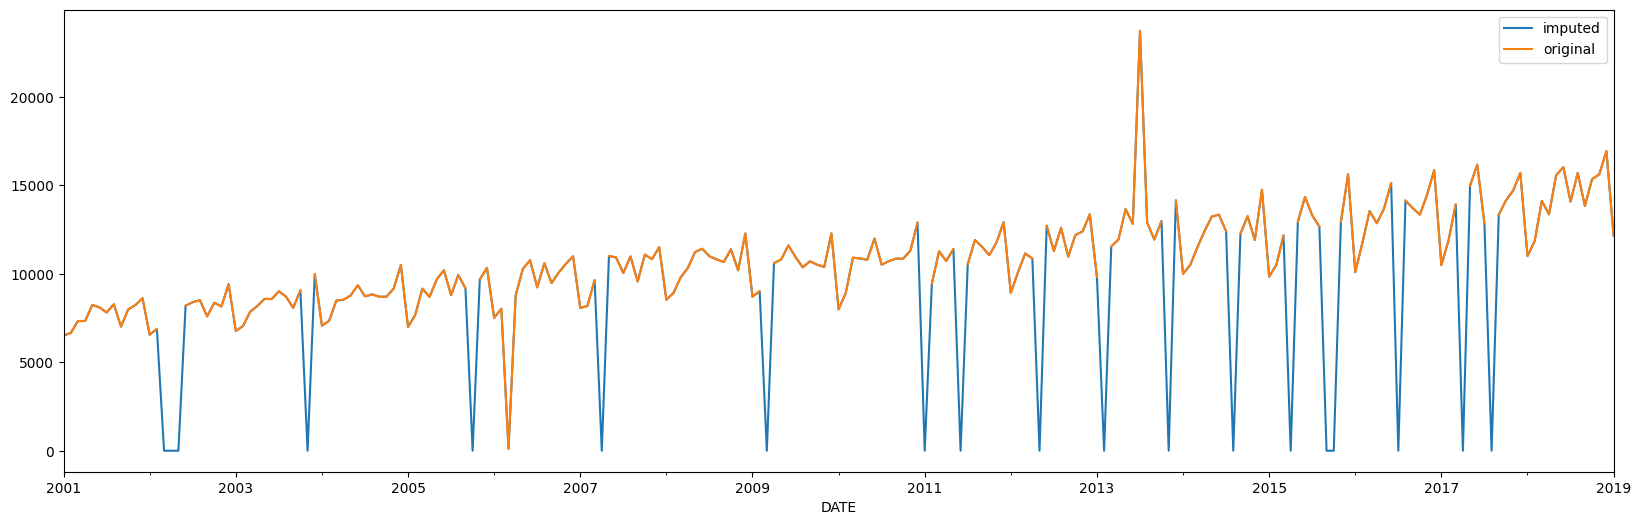

In [ ]:
mobile_sales['Sales'].fillna(0).plot(label="imputed")
mobile_sales['Sales'].plot(label="original")

plt.legend()
plt.show()

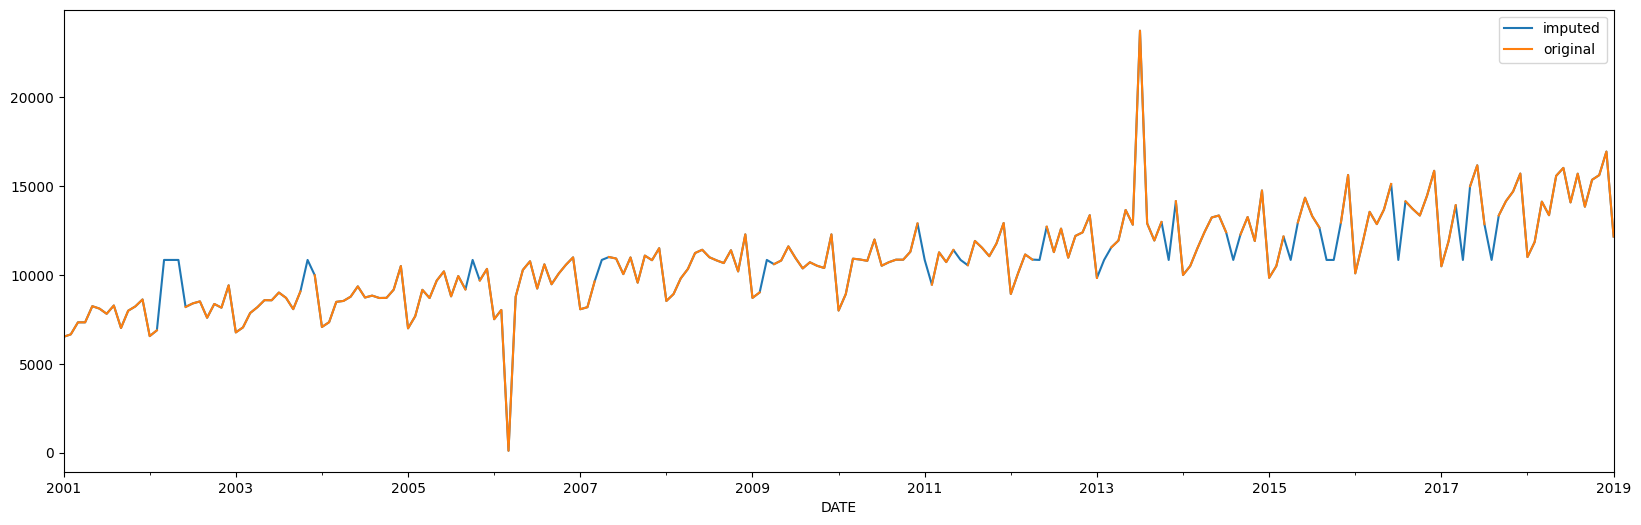

In [ ]:
mobile_sales['Sales'].fillna(mobile_sales['Sales'].mean()).plot(label="imputed")
mobile_sales['Sales'].plot(label="original")

plt.legend()
plt.show()

In [ ]:
mobile_sales['Sales'].mean()

10842.757575757576

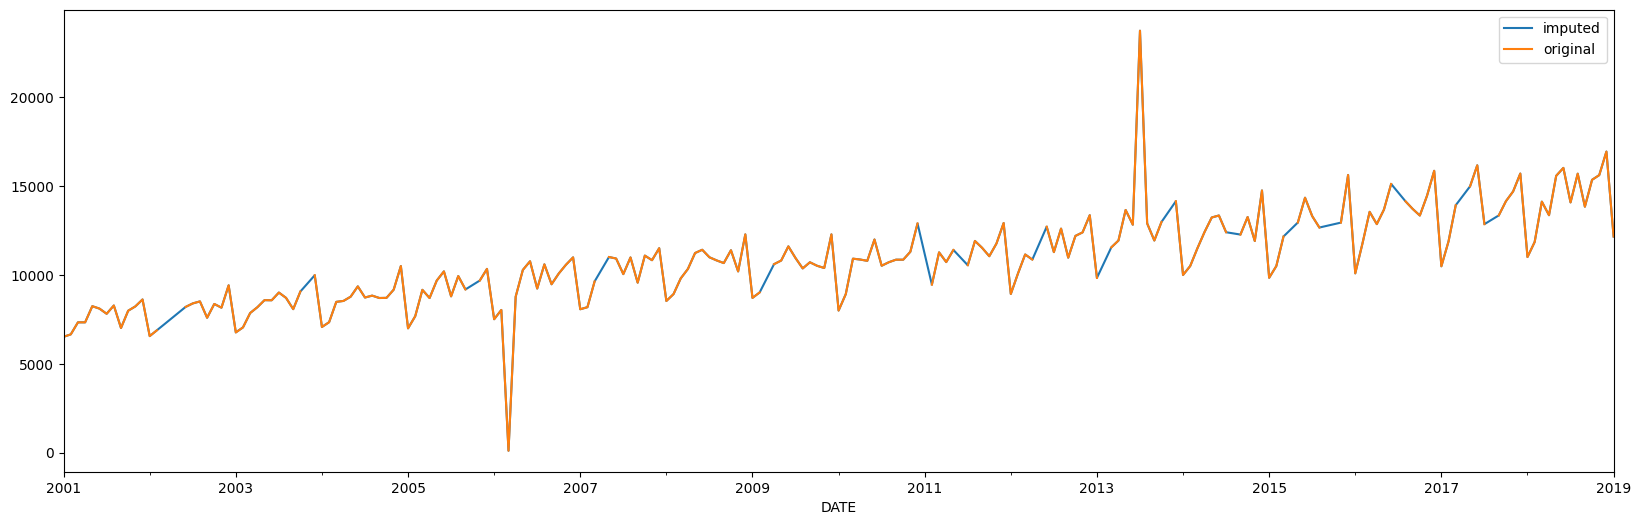

In [ ]:
# linear interpolation

mobile_sales.Sales.interpolate(method  = 'linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')

plt.legend();

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method  = 'linear')

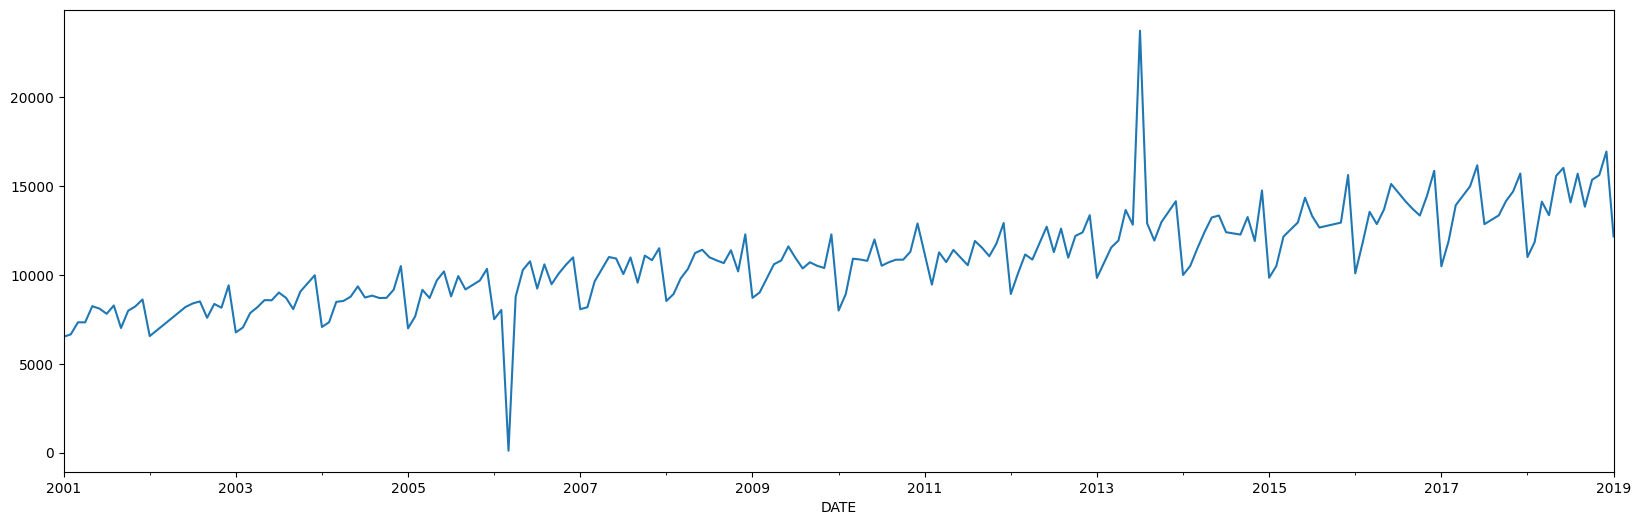

In [ ]:
mobile_sales.Sales.plot();

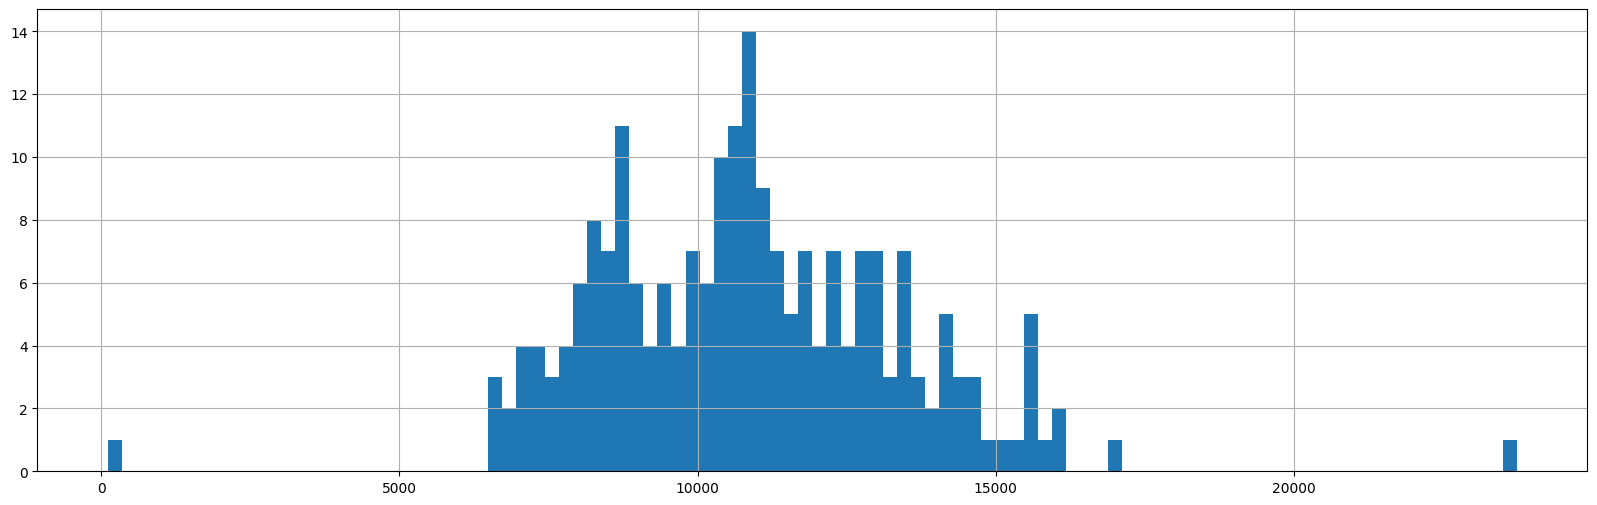

In [ ]:
mobile_sales.Sales.hist(bins = 100).plot();

<Axes: xlabel='DATE'>

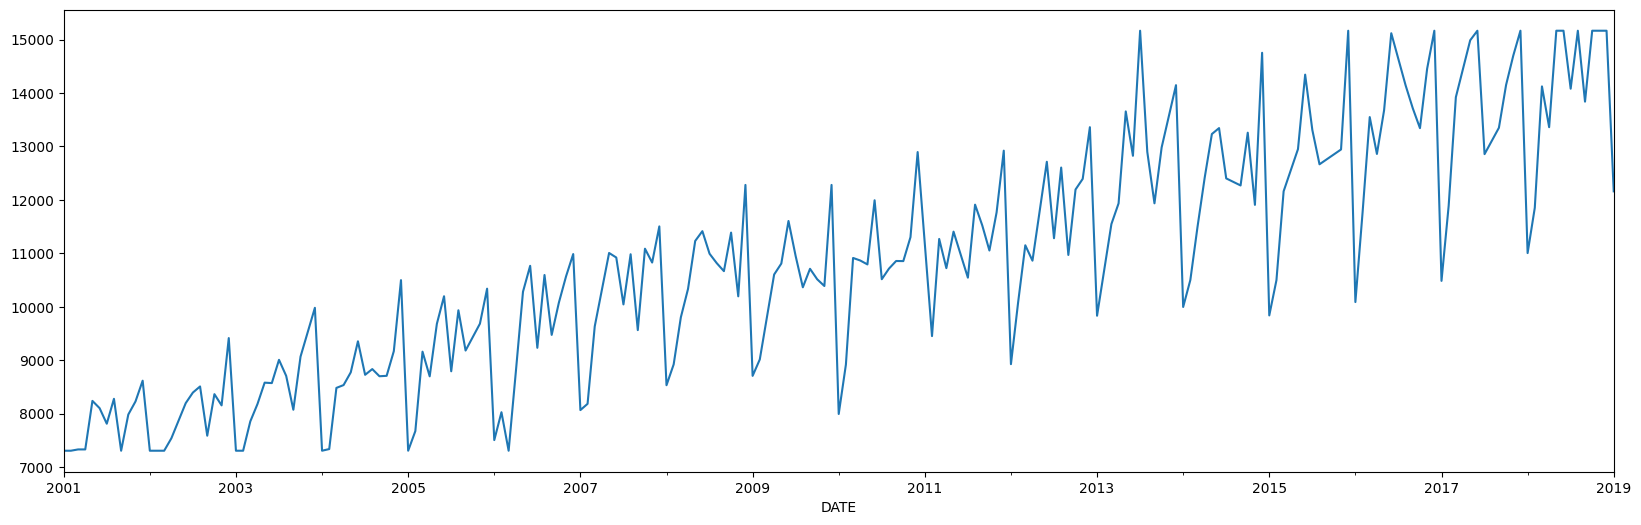

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95),
                        lower=mobile_sales.Sales.quantile(0.05)).plot()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98),
                                             lower=mobile_sales.Sales.quantile(0.02))

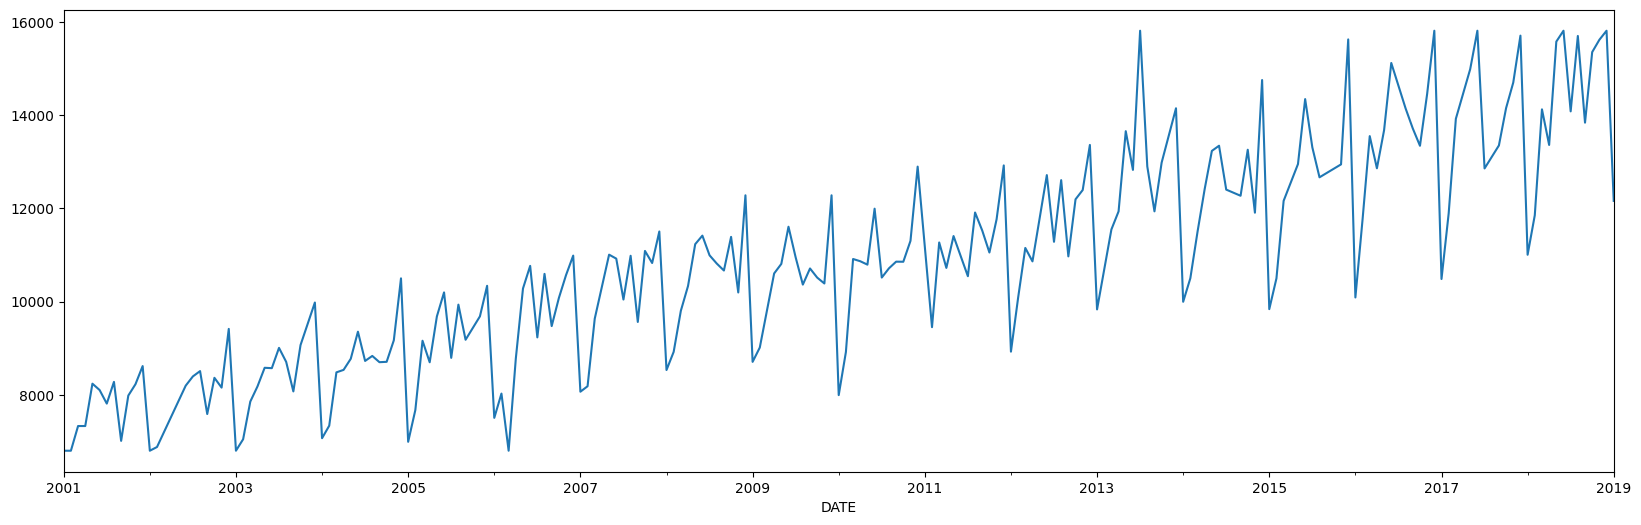

In [ ]:
mobile_sales.Sales.plot();

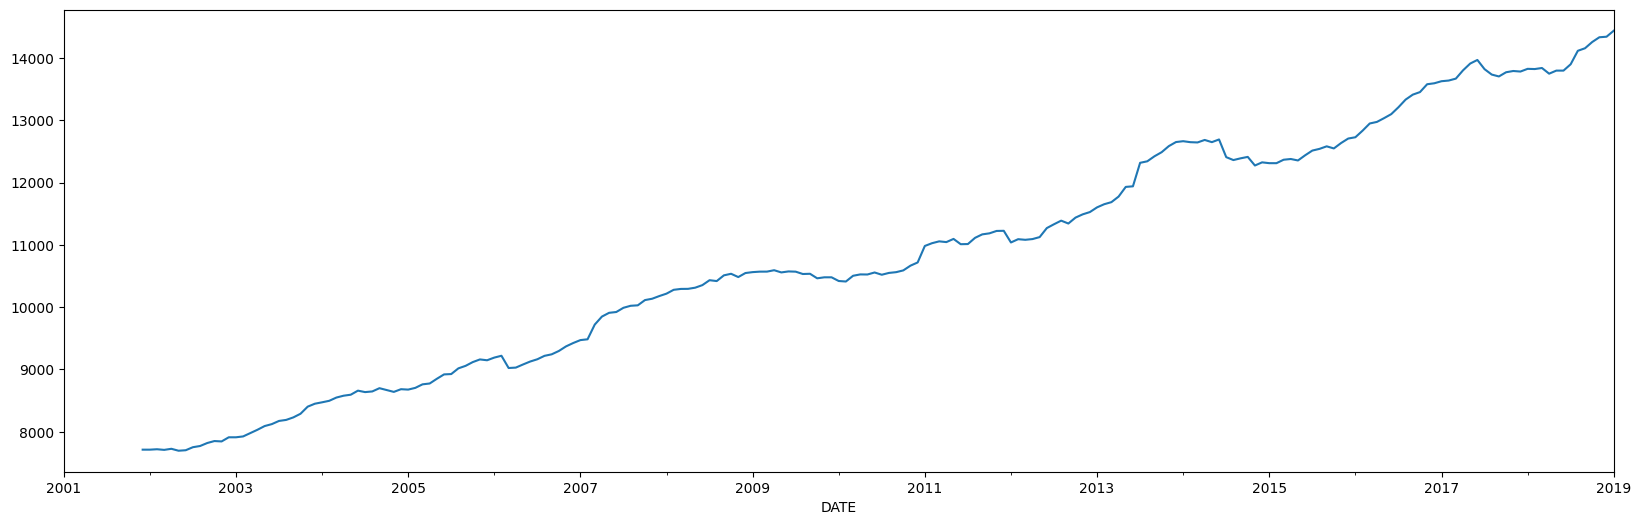

In [ ]:
mobile_sales.Sales.rolling(12).mean().plot(); # MA(12)

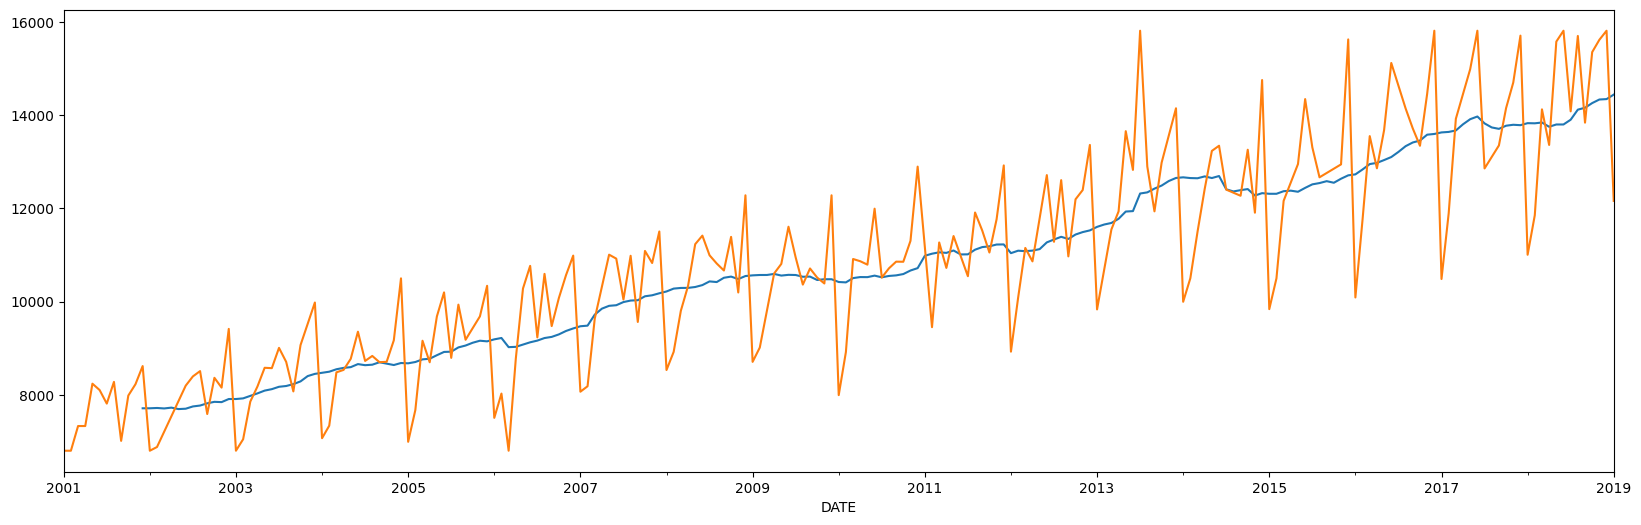

In [ ]:
mobile_sales.Sales.rolling(12).mean().plot()
mobile_sales.Sales.plot();

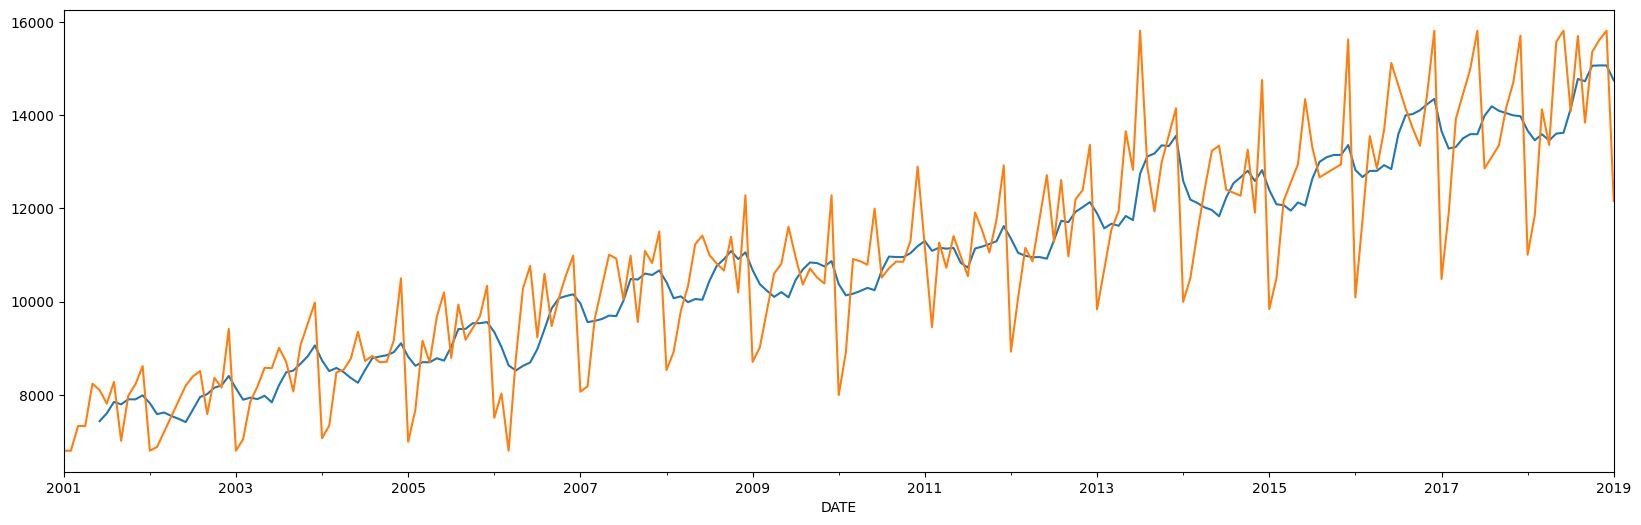

In [ ]:
mobile_sales.Sales.rolling(6).mean().plot()
mobile_sales.Sales.plot();

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales);

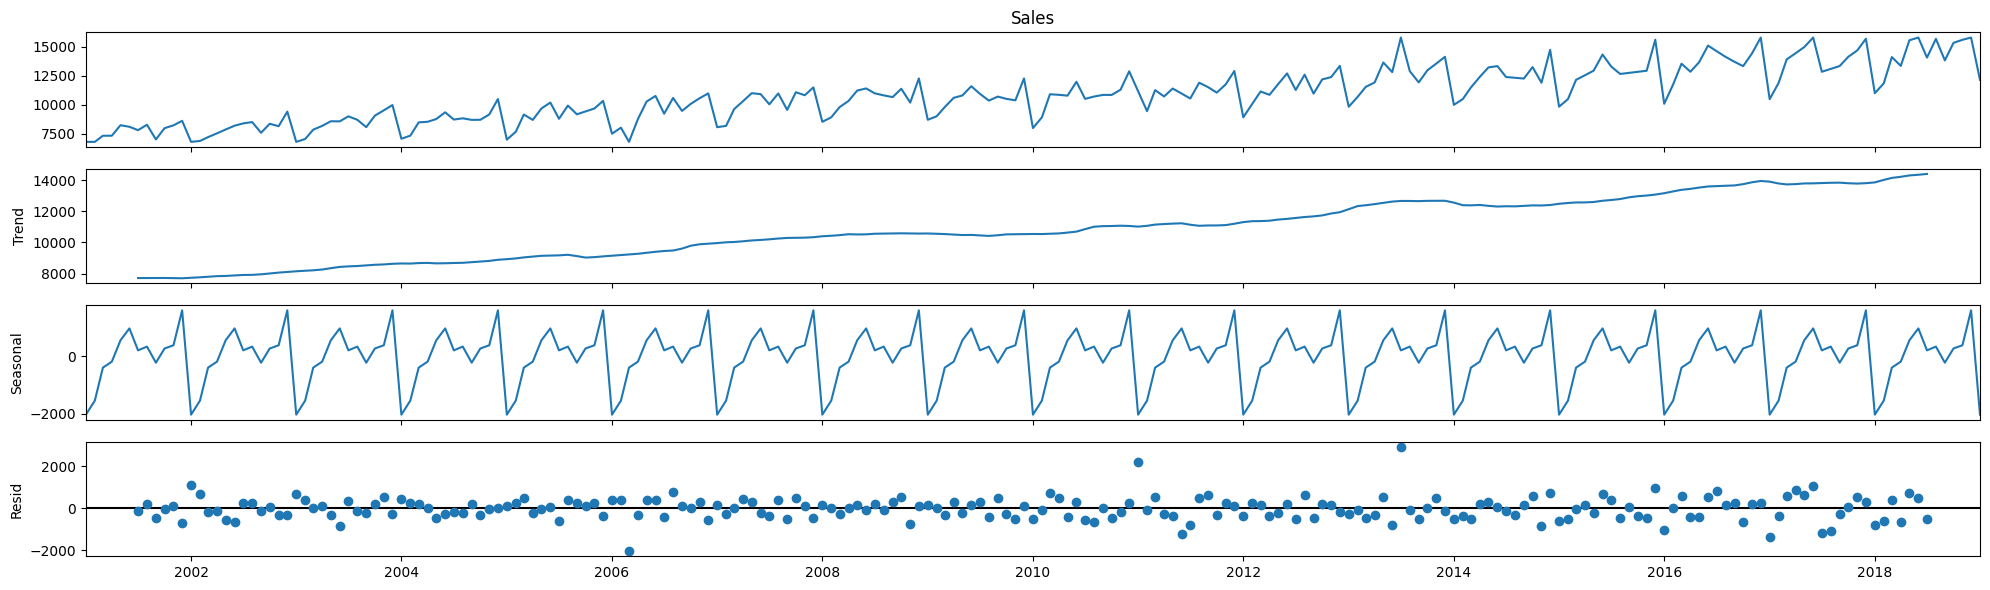

In [ ]:
model.plot();

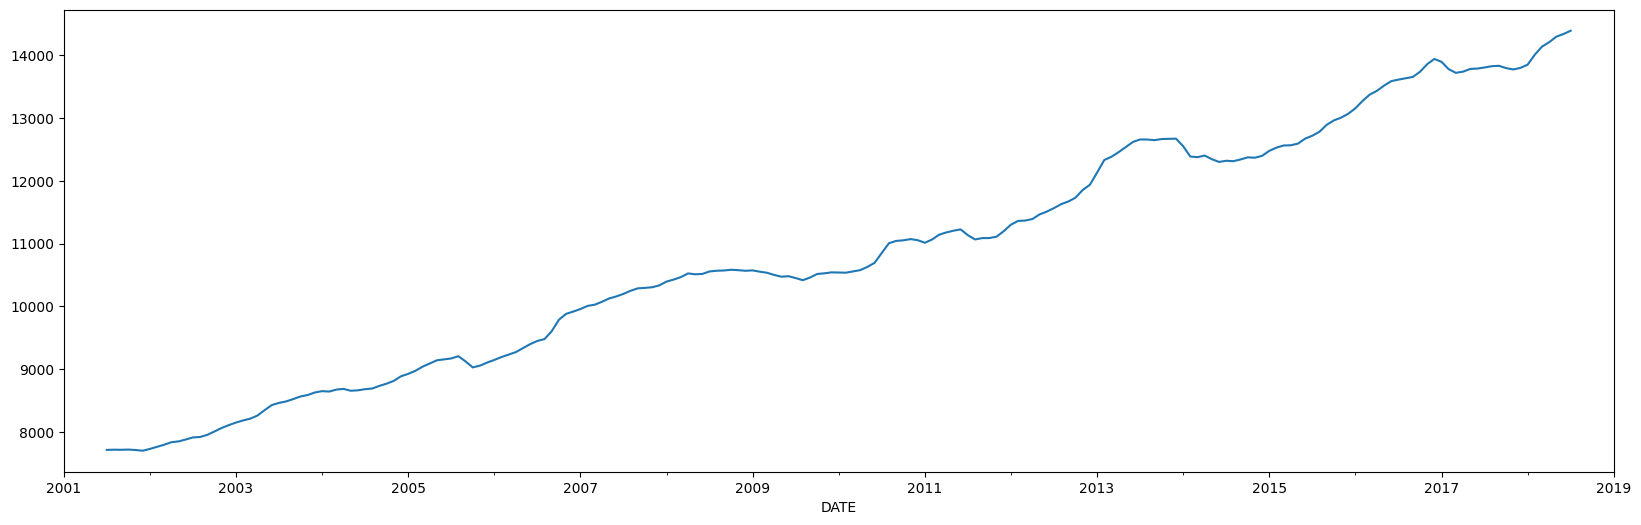

In [ ]:
model.trend.plot();

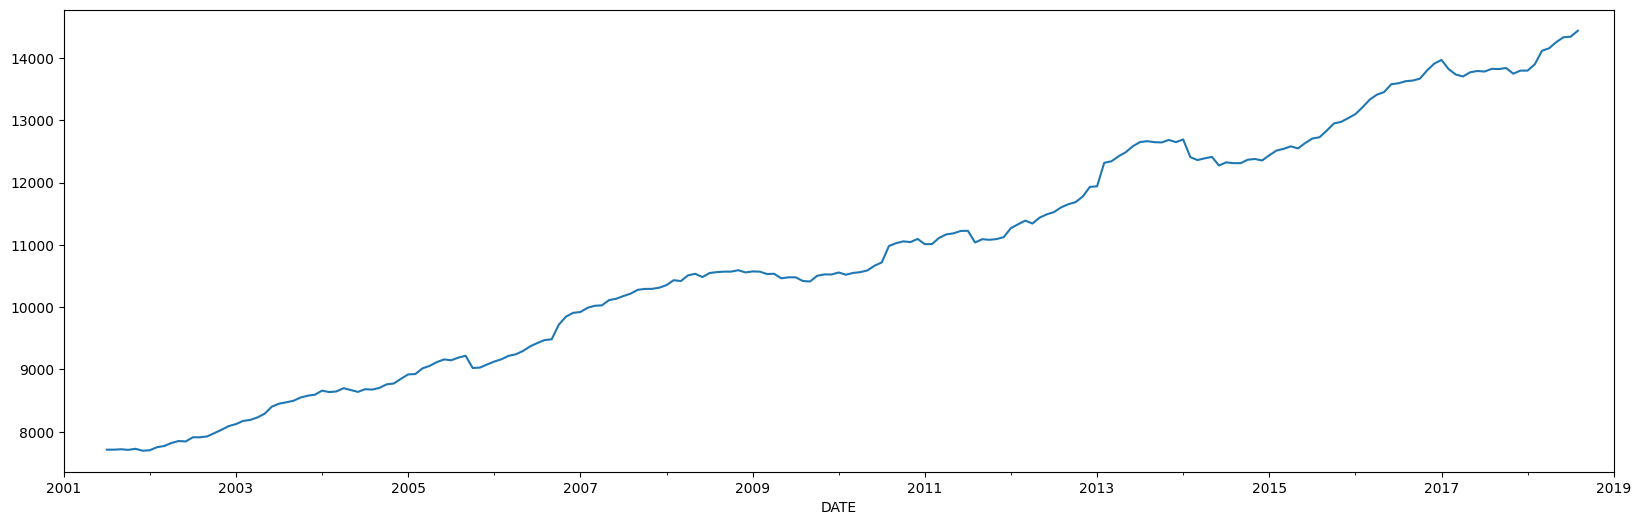

In [ ]:
mobile_sales.Sales.rolling(12, center = True).mean().plot(); # MA(12)

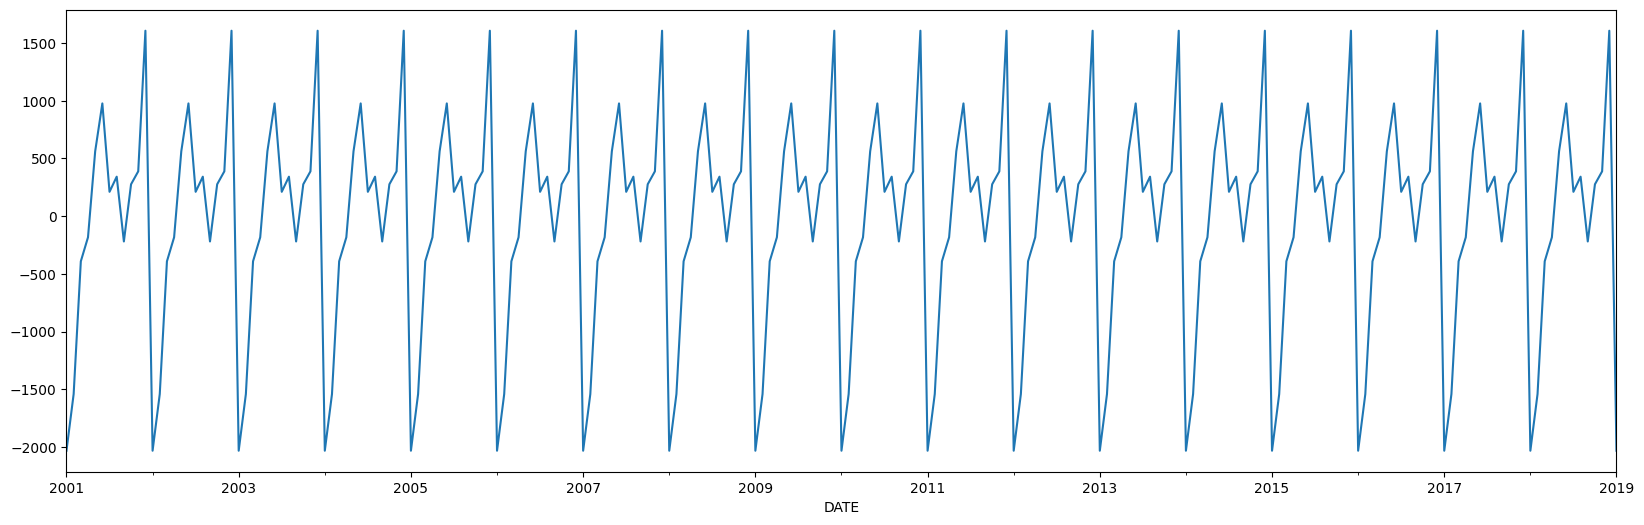

In [ ]:
model.seasonal.plot();

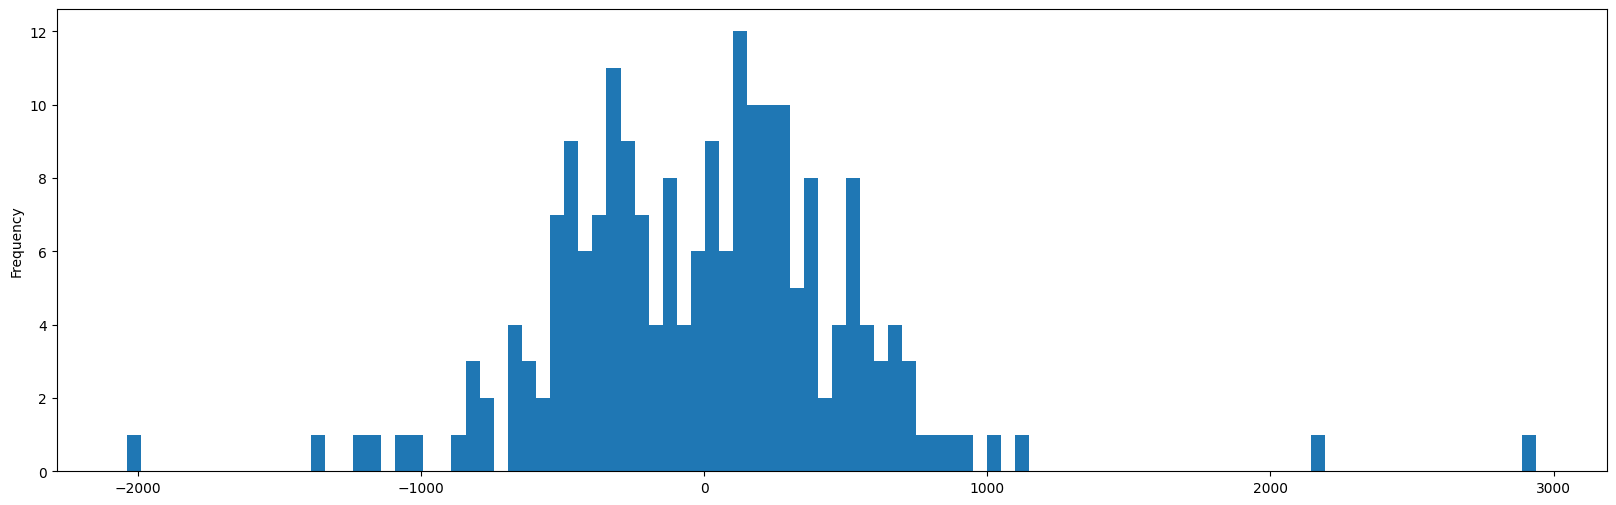

In [ ]:
model.resid.plot(kind = 'hist', bins = 100);

In [ ]:
model.resid.mean()

-3.2316417029771514

# Lecture-2

In [ ]:
mobile_sales.shape

(217, 1)

In [ ]:
train_max_date = mobile_sales.index[-12]



train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

In [ ]:
train_x.shape, test_x.shape

((205, 1), (12, 1))

In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
train_x['Sales'].mean()

10653.201951219511

In [ ]:
# Mean model
test_x['pred'] = train_x['Sales'].mean()
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,10653.201951
2018-03-01,14123.0,10653.201951
2018-04-01,13360.0,10653.201951
2018-05-01,15576.0,10653.201951
2018-06-01,15809.4,10653.201951


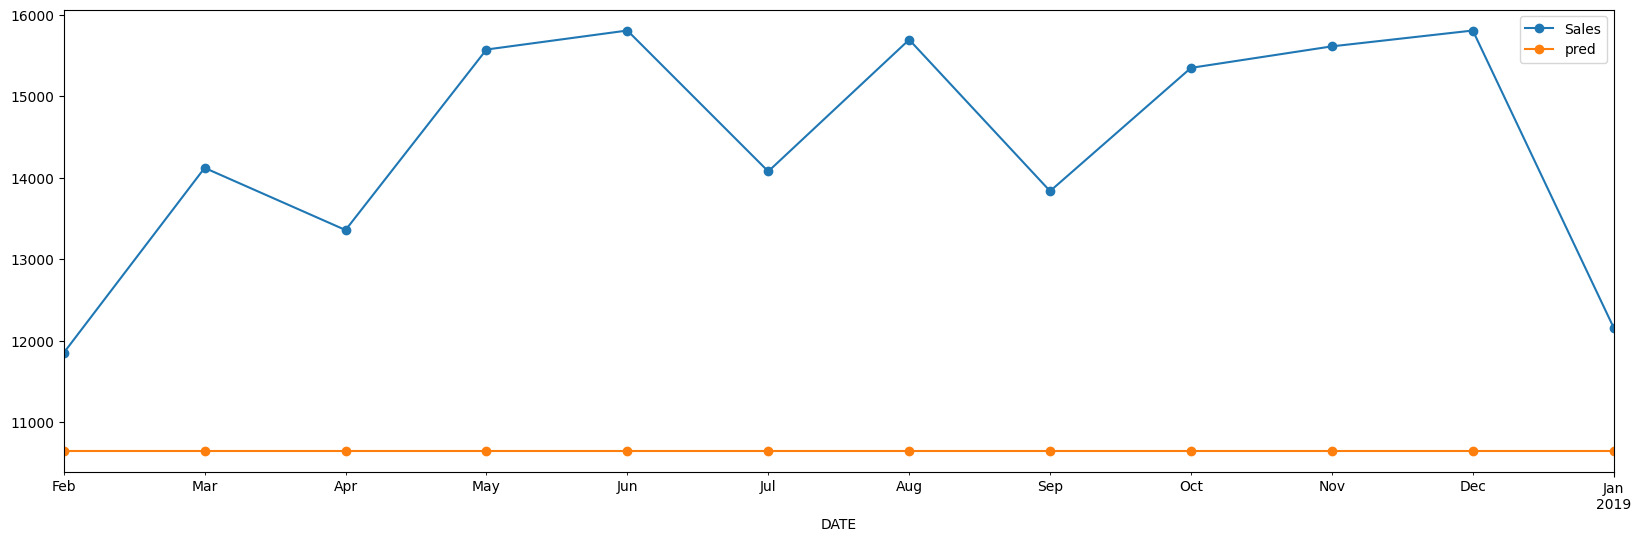

In [ ]:
test_x.plot(style='-o');

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


In [ ]:
test_x['pred'] = train_x['Sales'][-1]

<ipython-input-50-e203e6b02beb>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


In [ ]:
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,15809.4,11005.0


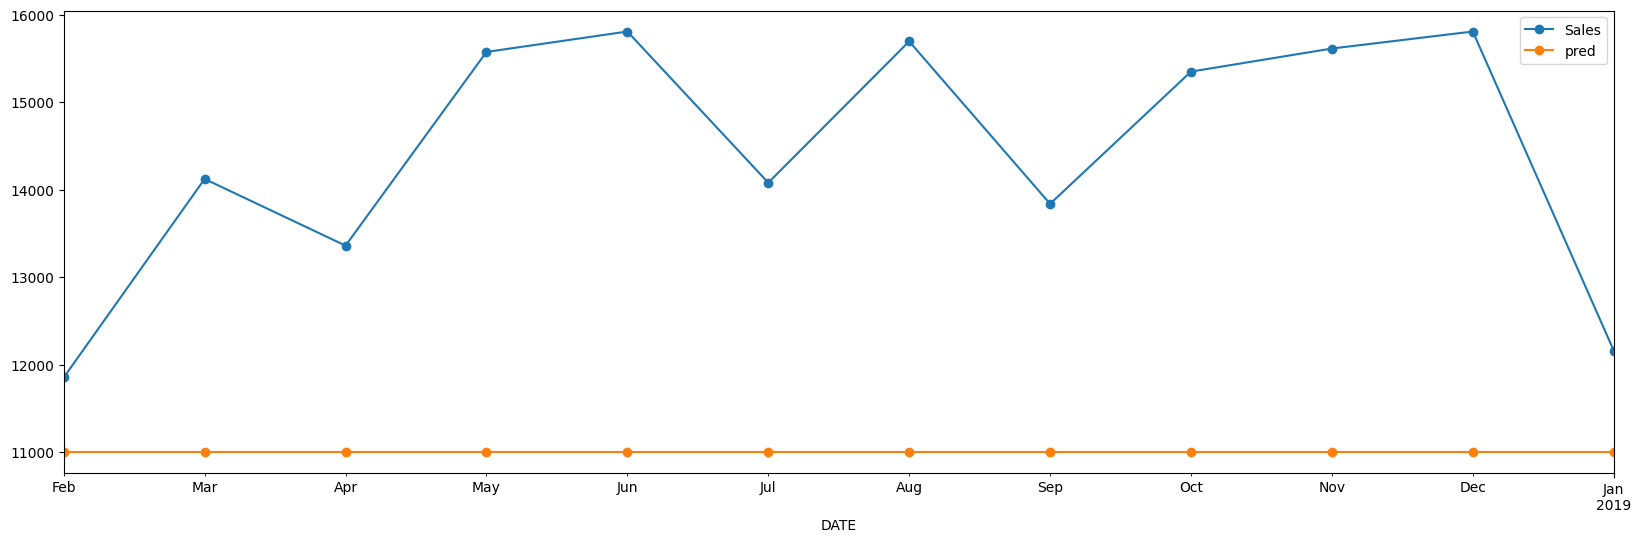

In [ ]:
test_x.plot(style='-o');

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


In [ ]:
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,15809.4,11005.0


In [ ]:
# Seasonal Naive
pred = []

for i in test_x.index:
  pred.append(train_x.loc[i - pd.DateOffset(years=1)]['Sales'])

test_x['pred'] = pred
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,15809.4,15809.4


In [ ]:
train_x[-5:]

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


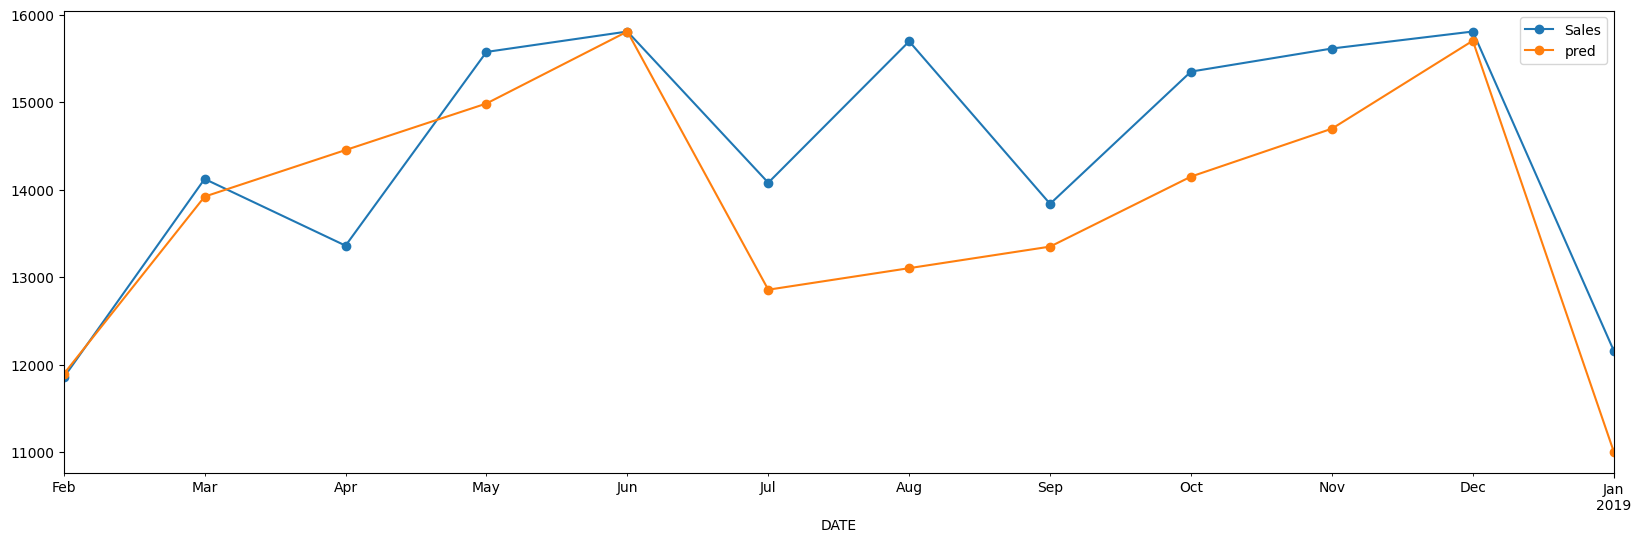

In [ ]:
test_x.plot(style='-o');

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


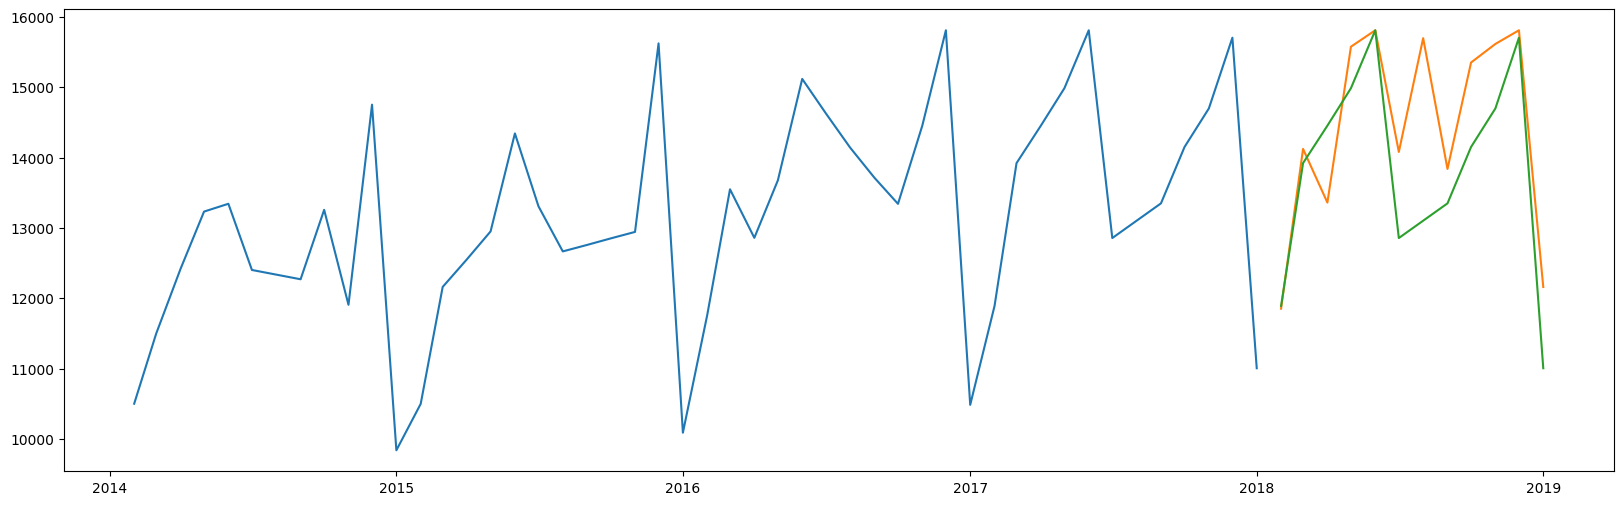

In [ ]:
plt.plot(train_x['Sales'][-48:], label='train')
plt.plot(test_x)
plt.plot();

In [ ]:
# Get the slope
yt = train_x['Sales'][-1]

m = (yt - train_x['Sales'][0]) / len(train_x)

h = np.arange(0, 12)

test_x['pred'] = yt +  h*m

<ipython-input-67-5bb0365d82f0>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yt = train_x['Sales'][-1]
<ipython-input-67-5bb0365d82f0>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (yt - train_x['Sales'][0]) / len(train_x)


In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.000000
2018-03-01,14123.0,11025.500293
2018-04-01,13360.0,11046.000585
2018-05-01,15576.0,11066.500878
2018-06-01,15809.4,11087.001171
2018-07-01,14080.0,11107.501463
2018-08-01,15697.0,11128.001756
2018-09-01,13838.0,11148.502049
2018-10-01,15351.0,11169.002341


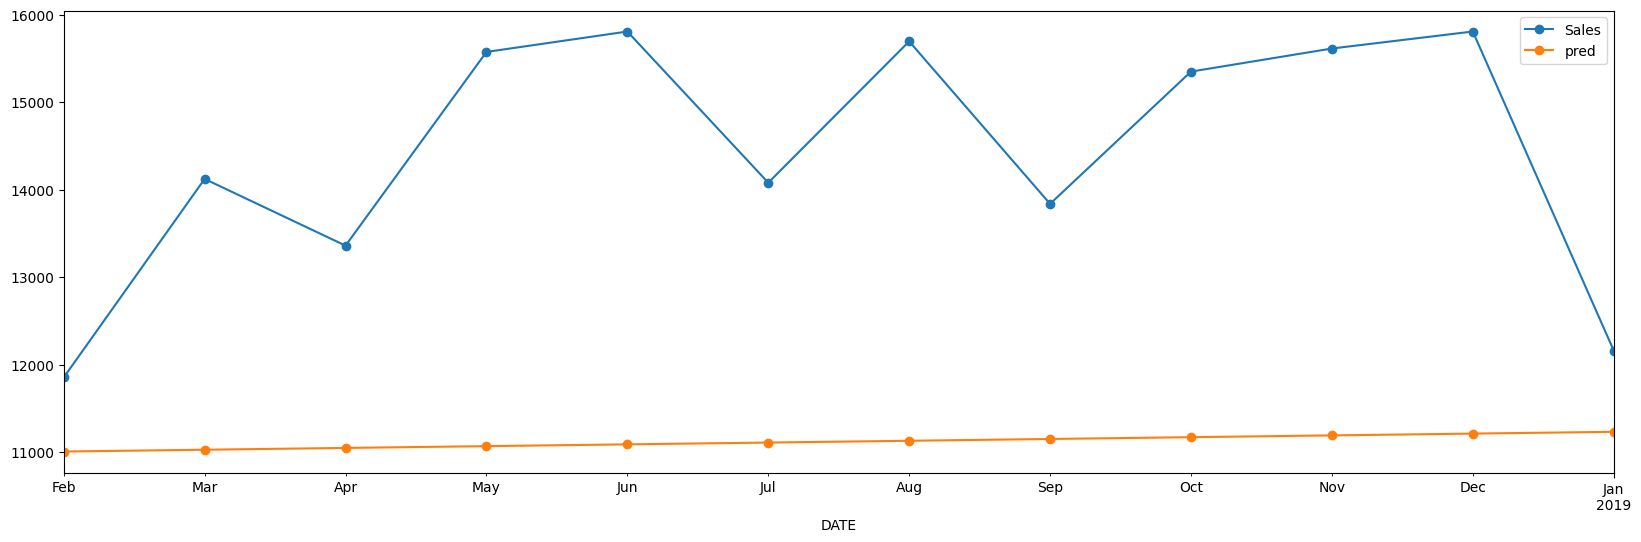

In [ ]:
test_x.plot(style='-o');

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3321.482
RMSE : 3586.323
MAPE: 0.223


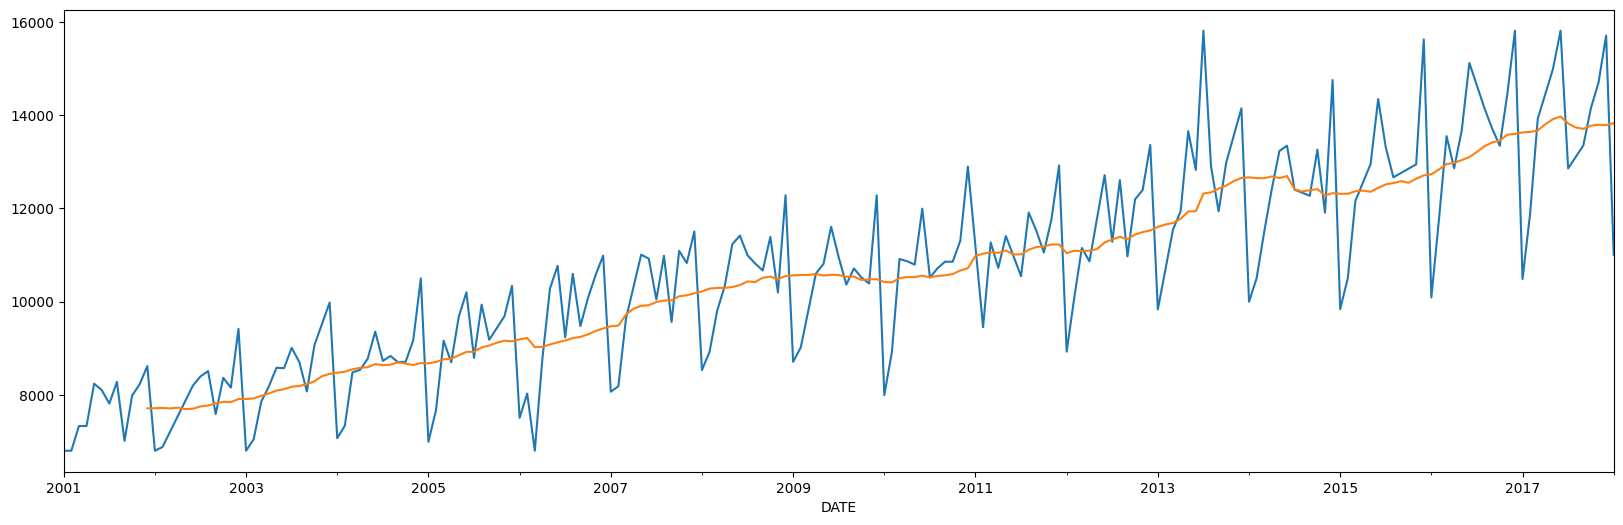

In [ ]:
train_x.Sales.plot();
train_x.Sales.rolling(12).mean().plot();

In [ ]:
pred_ = train_x.Sales.copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-6:].mean()) # MA(6) last 6 months avg.

test_x['pred'] = pred_[-12:] # predictions

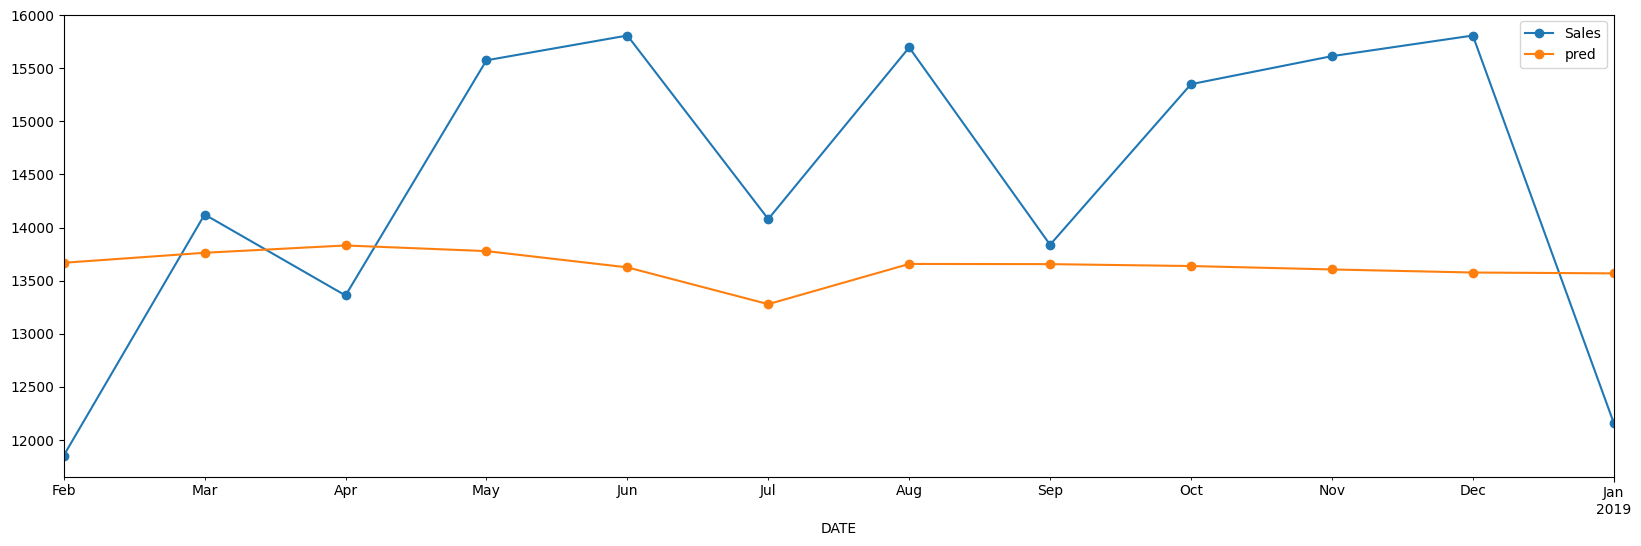

In [ ]:
test_x.plot(style='-o');

In [ ]:
performance(test_x.Sales, test_x.pred);

MAE : 1418.284
RMSE : 1592.63
MAPE: 0.097


In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2) # alpha
pred = model.forecast(12) # pred for next 12 months.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


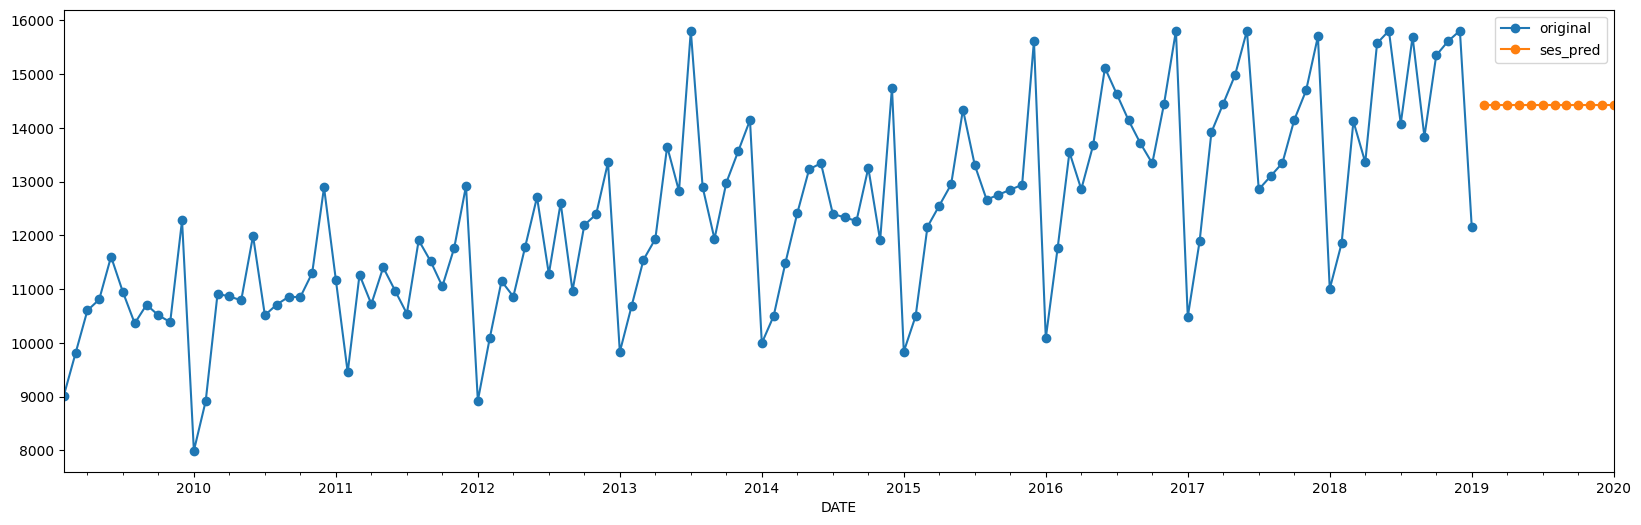

In [ ]:
mobile_sales.Sales[-120:].plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o')
plt.legend()